# Modeling Your Data - Lab

## Introduction 

In this lab you'll perform a full linear regression on the data. You'll implement the process demonstrated in the previous lesson, taking a stepwise approach to analyze and improve the model along the way.

## Objectives
You will be able to:

* Remove predictors with p-values too high and refit the model
* Examine and interpret the model results
* Split data into training and testing sets
* Fit a regression model to the data set using statsmodel library


## Build an Initial Regression Model

To start, perform a train-test split and create an initial regression model to model the `list_price` using all of your available features.

> **Note:** In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.  
**If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)" then you need to further preprocess your column names.**

In [1]:
#Your code here
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Lego_dataset_cleaned.csv')
df.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10+,ages_10-14,ages_10-16,ages_10-21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very Challenging,review_difficulty_Very Easy,review_difficulty_unknown
0,-0.273020,29.99,-0.398512,-0.655279,-0.045687,-0.365010,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,-0.404154,19.99,-0.398512,-0.655279,0.990651,-0.365010,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,-0.517242,12.99,-0.147162,-0.132473,-0.460222,-0.204063,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0.635296,99.99,0.187972,-1.352353,0.161581,0.117830,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0.288812,79.99,-0.063378,-2.049427,0.161581,-0.204063,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [3]:
subs = [(' ', '_'),('.',''),("'",""),('™', ''), ('®',''),
        ('+','plus'), ('½','half'), ('-','_')
       ]
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col

In [4]:
df.columns = [col_formatting(col) for col in df.columns]

In [5]:
list(df.columns)

['piece_count',
 'list_price',
 'num_reviews',
 'play_star_rating',
 'star_rating',
 'val_star_rating',
 'ages_10plus',
 'ages_10_14',
 'ages_10_16',
 'ages_10_21',
 'ages_11_16',
 'ages_12plus',
 'ages_12_16',
 'ages_14plus',
 'ages_16plus',
 'ages_1half_3',
 'ages_1half_5',
 'ages_2_5',
 'ages_4plus',
 'ages_4_7',
 'ages_4_99',
 'ages_5plus',
 'ages_5_12',
 'ages_5_8',
 'ages_6plus',
 'ages_6_12',
 'ages_6_14',
 'ages_7plus',
 'ages_7_12',
 'ages_7_14',
 'ages_8plus',
 'ages_8_12',
 'ages_8_14',
 'ages_9plus',
 'ages_9_12',
 'ages_9_14',
 'ages_9_16',
 'theme_name_Angry_Birds',
 'theme_name_Architecture',
 'theme_name_BOOST',
 'theme_name_Blues_Helicopter_Pursuit',
 'theme_name_BrickHeadz',
 'theme_name_Carnotaurus_Gyrosphere_Escape',
 'theme_name_City',
 'theme_name_Classic',
 'theme_name_Creator_3_in_1',
 'theme_name_Creator_Expert',
 'theme_name_DC_Comics_Super_Heroes',
 'theme_name_DC_Super_Hero_Girls',
 'theme_name_DIMENSIONS',
 'theme_name_DUPLO',
 'theme_name_Dilophosaurus_Out

## Remove the Uninfluential Features

Based on the initial model, remove those features which do not appear to be statistically relevant and rerun the model.

In [6]:
#Your code here
#Defining the problem
outcome = 'list_price'
x_cols = list(df.columns)
x_cols.remove(outcome)

In [7]:
train, test = train_test_split(df)

In [8]:
print(len(train), len(test))
train.head()

8152 2718


,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10plus,ages_10_14,ages_10_16,ages_10_21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very_Challenging,review_difficulty_Very_Easy,review_difficulty_unknown
7198,-0.467916,24.3878,-0.286801,0.216064,0.161581,0.117830,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4800,2.154768,179.8800,0.997879,0.564601,0.783383,0.922564,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7875,-0.062483,67.0878,-0.147162,-0.306741,-0.045687,0.278777,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
9585,-0.455886,28.3929,-0.286801,0.216064,0.161581,0.117830,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
10179,-0.425809,66.6971,-0.286801,0.216064,0.161581,0.117830,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [9]:
#Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     559.9
Date:                Mon, 01 Jul 2019   Prob (F-statistic):               0.00
Time:                        18:33:52   Log-Likelihood:                -40455.
No. Observations:                8152   AIC:                         8.110e+04
Df Residuals:                    8057   BIC:                         8.177e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           65.1929      1.723     37.843      0.000      61.816      68.570
piece_count                                         73.5536      0.894     82.304      0.000      71.802      75.305
num_reviews                                          6.7880      0.672     10.106      0.000       5.471       8.105
play_star_rating                                     4.3661      0.622      7.020      0.000       3.147       5.585
star_rating                                         -0.8016      0.707     -1.134      0.257      -2.187       0.584
val_star_rating                                     -8.0193      0.625    -12.831      0.000      -9.244      -6.794
ages_10plus                                        125.5582      6.550     19.169      0.000     112.718     138.398
ages_10_14                                         -22.3769      9.390     -2.383      0.017     -40.784      -3.970
ages_10_16                                         -10.4291      4.049     -2.576      0.010     -18.366      -2.492
ages_10_21                                          44.0776      7.365      5.985      0.000      29.640      58.515
ages_11_16                                         -14.7472      6.008     -2.455      0.014     -26.524      -2.970
ages_12plus                                         72.6218      5.626     12.908      0.000      61.593      83.651
ages_12_16                                         -52.7348      6.853     -7.695      0.000     -66.169     -39.301
ages_14plus                                         22.9915      4.026      5.711      0.000      15.099      30.884
ages_16plus                                         37.0190      6.010      6.160      0.000      25.238      48.799
ages_1half_3                                        -9.4733      2.364     -4.007      0.000     -14.107      -4.839
ages_1half_5                                        -4.6213      2.902     -1.593      0.111     -10.310       1.067
ages_2_5                                            14.6575      1.655      8.856      0.000      11.413      17.902
ages_4plus                                         -20.6516      6.255     -3.302      0.001     -32.913      -8.390
ages_4_7                                            -7.2545      3.601     -2.015      0.044     -14.313      -0.196
ages_4_99                                           -2.6133      3.554     -0.735      0.462      -9.580       4.353
ages_5plus                                          -9.6232      3.198     -3.009      0.003     -15.892      -3.354
ages_5_12                                          -37.5879      3.084    -12.189      0.000     -43.633     -31.543
ages_5_8                                 

> **Comment:** You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

In [10]:
#Your code here
#Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|']<0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

103 73
['piece_count', 'num_reviews', 'play_star_rating', 'val_star_rating', 'ages_10plus']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,65.1929,1.723,37.843,0.000,61.816,68.570
piece_count,73.5536,0.894,82.304,0.000,71.802,75.305
num_reviews,6.7880,0.672,10.106,0.000,5.471,8.105
play_star_rating,4.3661,0.622,7.020,0.000,3.147,5.585
star_rating,-0.8016,0.707,-1.134,0.257,-2.187,0.584


In [11]:
#Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     730.9
Date:                Mon, 01 Jul 2019   Prob (F-statistic):               0.00
Time:                        18:35:17   Log-Likelihood:                -40465.
No. Observations:                8152   AIC:                         8.108e+04
Df Residuals:                    8079   BIC:                         8.159e+04
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           64.0086      2.321     27.577      0.000      59.459      68.558
piece_count                                         73.8105      0.872     84.631      0.000      72.101      75.520
num_reviews                                          6.7189      0.658     10.210      0.000       5.429       8.009
play_star_rating                                     4.0729      0.521      7.819      0.000       3.052       5.094
val_star_rating                                     -8.3014      0.487    -17.047      0.000      -9.256      -7.347
ages_10plus                                        122.4077      5.215     23.472      0.000     112.185     132.630
ages_10_14                                         -17.4699      9.898     -1.765      0.078     -36.873       1.933
ages_10_16                                          -6.1942      4.268     -1.451      0.147     -14.562       2.173
ages_10_21                                          37.9614      3.711     10.231      0.000      30.688      45.235
ages_11_16                                         -10.7372      6.127     -1.753      0.080     -22.747       1.272
ages_12plus                                         73.9402      6.285     11.764      0.000      61.619      86.261
ages_12_16                                         -48.3964      7.391     -6.548      0.000     -62.884     -33.908
ages_14plus                                         27.1339      4.892      5.546      0.000      17.543      36.724
ages_16plus                                         40.1691      6.850      5.864      0.000      26.741      53.597
ages_1half_3                                        -3.5206      3.516     -1.001      0.317     -10.412       3.371
ages_2_5                                            20.1437      2.638      7.637      0.000      14.973      25.314
ages_4plus                                         -19.1366      9.523     -2.009      0.045     -37.805      -0.468
ages_4_7                                            -2.1797      2.751     -0.792      0.428      -7.572       3.213
ages_5plus                                          -7.8293      3.265     -2.398      0.017     -14.230      -1.429
ages_5_12                                          -31.6405      3.128    -10.116      0.000     -37.772     -25.509
ages_6plus                                         -23.5632      5.882     -4.006      0.000     -35.093     -12.033
ages_6_12                                          -17.3239      2.507     -6.910      0.000     -22.238     -12.409
ages_7_12                                          -15.2073      2.755     -5.520      0.000     -20.608      -9.807
ages_7_14                                

In [12]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|']<0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

74 63
['piece_count', 'num_reviews', 'play_star_rating', 'val_star_rating', 'ages_10plus']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,64.0086,2.321,27.577,0.0,59.459,68.558
piece_count,73.8105,0.872,84.631,0.0,72.101,75.520
num_reviews,6.7189,0.658,10.210,0.0,5.429,8.009
play_star_rating,4.0729,0.521,7.819,0.0,3.052,5.094
val_star_rating,-8.3014,0.487,-17.047,0.0,-9.256,-7.347


In [13]:
#Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     847.6
Date:                Mon, 01 Jul 2019   Prob (F-statistic):               0.00
Time:                        18:36:25   Log-Likelihood:                -40475.
No. Observations:                8152   AIC:                         8.108e+04
Df Residuals:                    8089   BIC:                         8.152e+04
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           62.3432      1.220     51.092      0.000      59.951      64.735
piece_count                                         73.4540      0.794     92.499      0.000      71.897      75.011
num_reviews                                          6.6998      0.654     10.237      0.000       5.417       7.983
play_star_rating                                     4.1817      0.513      8.150      0.000       3.176       5.188
val_star_rating                                     -8.4452      0.481    -17.558      0.000      -9.388      -7.502
ages_10plus                                        125.8282      4.818     26.119      0.000     116.385     135.272
ages_10_21                                          40.3196      3.195     12.619      0.000      34.056      46.583
ages_12plus                                         78.3302      5.808     13.486      0.000      66.944      89.716
ages_12_16                                         -41.8026      6.819     -6.131      0.000     -55.169     -28.436
ages_14plus                                         32.8744      4.099      8.020      0.000      24.839      40.909
ages_16plus                                         46.5146      5.920      7.857      0.000      34.910      58.120
ages_2_5                                            22.5602      1.803     12.512      0.000      19.026      26.095
ages_4plus                                         -19.0509      9.524     -2.000      0.046     -37.721      -0.381
ages_5plus                                          -6.6852      3.128     -2.137      0.033     -12.816      -0.554
ages_5_12                                          -28.5720      2.520    -11.337      0.000     -33.512     -23.632
ages_6plus                                         -20.6396      5.563     -3.710      0.000     -31.545      -9.734
ages_6_12                                          -13.8586      1.560     -8.884      0.000     -16.916     -10.801
ages_7_12                                          -12.2035      1.912     -6.383      0.000     -15.951      -8.456
ages_7_14                                           -8.7767      1.660     -5.286      0.000     -12.031      -5.522
ages_8plus                                          15.9478      4.339      3.675      0.000       7.442      24.454
ages_8_12                                          -11.7908      2.466     -4.782      0.000     -16.624      -6.957
ages_8_14                                           -6.3813      1.615     -3.951      0.000      -9.547      -3.215
ages_9plus                                         111.0914     10.348     10.736      0.000      90.807     131.375
ages_9_12                                

## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extend of this problem.

In [14]:
#Your code here
#Your code here
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

/opt/conda/envs/learn-env/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[('piece_count', 4.028247536004186),
 ('num_reviews', 2.8652369699942395),
 ('play_star_rating', 1.7720748237866357),
 ('val_star_rating', 1.5875221268479833),
 ('ages_10plus', 7.047439512796757),
 ('ages_10_21', 1.058327541473095),
 ('ages_12plus', 5.922615246704636),
 ('ages_12_16', 1.1279375061585013),
 ('ages_14plus', 1.9391205822858666),
 ('ages_16plus', 8.382130833680597),
 ('ages_2_5', 1.2116276287936933),
 ('ages_4plus', 1.1964644323550018),
 ('ages_5plus', inf),
 ('ages_5_12', 3.178292060075735),
 ('ages_6plus', 2.660819455202803),
 ('ages_6_12', 1.7605482993257546),
 ('ages_7_12', 1.4124693684463847),
 ('ages_7_14', 1.6862928717014298),
 ('ages_8plus', 2.578207038817573),
 ('ages_8_12', 1.2206781291760351),
 ('ages_8_14', 1.511653291620168),
 ('ages_9plus', 1.4025197351604222),
 ('ages_9_12', 1.017621682947508),
 ('theme_name_Architecture', 5.130382763091491),
 ('theme_name_BOOST', 1.0592523409022938),
 ('theme_name_Blues_Helicopter_Pursuit', 1.0391893527164704),
 ('theme_nam

## Perform Another Round of Feature Selection

Once again, subset your features based on your findings above. Then rerun the model once again.

In [15]:
#Your code here
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

63 56


In [16]:
#Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     840.5
Date:                Mon, 01 Jul 2019   Prob (F-statistic):               0.00
Time:                        18:38:02   Log-Likelihood:                -40863.
No. Observations:                8152   AIC:                         8.184e+04
Df Residuals:                    8095   BIC:                         8.224e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           63.6060      1.127     56.457      0.000      61.397      65.814
piece_count                                         76.2306      0.666    114.486      0.000      74.925      77.536
num_reviews                                          5.3370      0.633      8.428      0.000       4.096       6.578
play_star_rating                                     5.1150      0.491     10.420      0.000       4.153       6.077
val_star_rating                                     -9.9489      0.484    -20.571      0.000     -10.897      -9.001
ages_10_21                                          39.7165      3.312     11.992      0.000      33.224      46.209
ages_12_16                                         -54.1290      6.910     -7.834      0.000     -67.674     -40.584
ages_14plus                                         10.2351      3.782      2.706      0.007       2.822      17.648
ages_2_5                                            22.4054      1.807     12.399      0.000      18.863      25.948
ages_4plus                                         -10.5173      9.918     -1.060      0.289     -29.959       8.924
ages_5_12                                          -29.9171      2.587    -11.566      0.000     -34.988     -24.847
ages_6plus                                         -23.0440      5.808     -3.967      0.000     -34.430     -11.658
ages_6_12                                          -16.2827      1.561    -10.432      0.000     -19.342     -13.223
ages_7_12                                          -13.5325      1.950     -6.940      0.000     -17.355      -9.710
ages_7_14                                          -10.4438      1.674     -6.240      0.000     -13.725      -7.163
ages_8plus                                           4.0466      4.447      0.910      0.363      -4.671      12.764
ages_8_12                                          -13.6403      2.515     -5.423      0.000     -18.571      -8.710
ages_8_14                                           -9.0831      1.643     -5.528      0.000     -12.304      -5.862
ages_9plus                                          22.9091     10.145      2.258      0.024       3.021      42.797
ages_9_12                                          -23.6850      6.193     -3.825      0.000     -35.824     -11.546
theme_name_BOOST                                    88.3153      9.397      9.398      0.000      69.894     106.736
theme_name_Blues_Helicopter_Pursuit                 21.0534     10.286      2.047      0.041       0.890      41.217
theme_name_Carnotaurus_Gyrosphere_Escape            45.9217      9.604      4.781      0.000      27.095      64.748
theme_name_City                          

## Check the Normality Assumption

Check whether the normality assumption holds for your model.

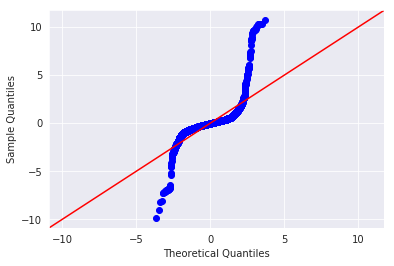

In [17]:
# Your code here
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

## Check Homoscedasticity Assumption

Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

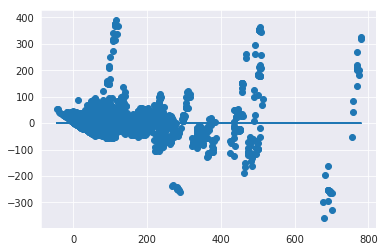

In [18]:
#Your code here
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

> **Comment:** This displays a fairly pronounced 'funnel' shape: errors appear to increase as the list_price increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confiding the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

## Make Additional Refinements

From here, make additional refinements to your model based on the above analysis. As you progress, continue to go back and check the assumptions for the updated model. Be sure to attempt at least 2 additional model refinements.

> **Comment:** Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.

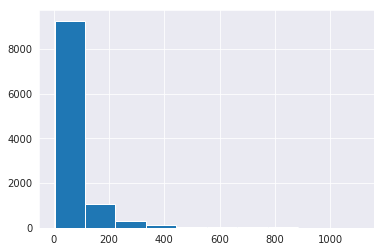

In [19]:
#Your code here
df.list_price.hist()

In [20]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.list_price.quantile(q=q)))

0.8 percentile: 90.986
0.81 percentile: 92.66216100000052
0.82 percentile: 97.5878
0.83 percentile: 101.898
0.84 percentile: 109.13971199999885
0.85 percentile: 110.352
0.86 percentile: 119.96492
0.87 percentile: 121.9878
0.88 percentile: 121.9878
0.89 percentile: 134.18779999999998
0.9 percentile: 143.952
0.91 percentile: 153.986
0.92 percentile: 170.7878
0.93 percentile: 182.9878
0.94 percentile: 198.7929
0.95 percentile: 220.03032999999942
0.96 percentile: 251.90543999999994
0.97 percentile: 292.7878
0.98 percentile: 359.88
0.99 percentile: 463.5878


In [21]:
orig_tot = len(df)
df = df[df.list_price < 450] #Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df))/orig_tot)
df.list_price = df.list_price.map(np.log) #Applying a log transformation
train, test = train_test_split(df)

#Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

Percent removed: 0.010487580496780129


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     435.1
Date:                Mon, 01 Jul 2019   Prob (F-statistic):               0.00
Time:                        18:39:53   Log-Likelihood:                -4967.0
No. Observations:                8067   AIC:                         1.005e+04
Df Residuals:                    8010   BIC:                         1.045e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            3.4243      0.014    245.788      0.000       3.397       3.452
piece_count                                          0.6511      0.010     67.058      0.000       0.632       0.670
num_reviews                                          0.0082      0.008      1.016      0.310      -0.008       0.024
play_star_rating                                     0.0897      0.006     14.643      0.000       0.078       0.102
val_star_rating                                     -0.1521      0.006    -25.105      0.000      -0.164      -0.140
ages_10_21                                           0.6920      0.040     17.106      0.000       0.613       0.771
ages_12_16                                          -0.2607      0.087     -3.012      0.003      -0.430      -0.091
ages_14plus                                          0.1473      0.051      2.892      0.004       0.047       0.247
ages_2_5                                             0.4704      0.022     21.188      0.000       0.427       0.514
ages_4plus                                          -1.3802      0.126    -10.952      0.000      -1.627      -1.133
ages_5_12                                           -0.7045      0.032    -21.974      0.000      -0.767      -0.642
ages_6plus                                          -0.9137      0.072    -12.733      0.000      -1.054      -0.773
ages_6_12                                           -0.1926      0.019    -10.023      0.000      -0.230      -0.155
ages_7_12                                            0.0656      0.024      2.723      0.006       0.018       0.113
ages_7_14                                           -0.0288      0.021     -1.399      0.162      -0.069       0.012
ages_8plus                                           0.5729      0.055     10.378      0.000       0.465       0.681
ages_8_12                                            0.1837      0.031      5.958      0.000       0.123       0.244
ages_8_14                                            0.2488      0.020     12.357      0.000       0.209       0.288
ages_9plus                                           0.2635      0.129      2.041      0.041       0.010       0.517
ages_9_12                                            0.3183      0.077      4.120      0.000       0.167       0.470
theme_name_BOOST                                     0.9355      0.113      8.305      0.000       0.715       1.156
theme_name_Blues_Helicopter_Pursuit                  0.6898      0.122      5.643      0.000       0.450       0.929
theme_name_Carnotaurus_Gyrosphere_Escape             1.0678      0.115      9.310      0.000       0.843       1.293
theme_name_City                          

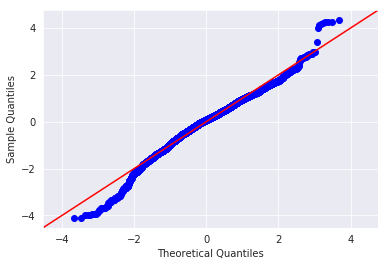

In [22]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

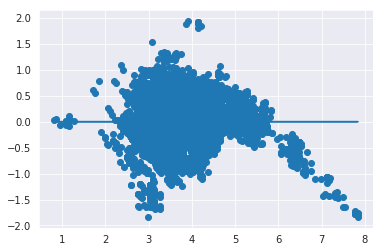

In [23]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

0.8 percentile: 4.447203233446613
0.81 percentile: 4.512971560274537
0.82 percentile: 4.542526402035123
0.83 percentile: 4.580752485605895
0.84 percentile: 4.640913706863106
0.85 percentile: 4.6985494117910225
0.86 percentile: 4.718373863481943
0.87 percentile: 4.787408405976297
0.88 percentile: 4.8039210397329235
0.89 percentile: 4.826327766567244
0.9 percentile: 4.89924031131419
0.91 percentile: 4.976713742220571
0.92 percentile: 5.0490223265009595
0.93 percentile: 5.140421850231899
0.94 percentile: 5.209419483952433
0.95 percentile: 5.292263579298989
0.96 percentile: 5.391752152536553
0.97 percentile: 5.528952783620542
0.98 percentile: 5.678340376637527
0.99 percentile: 5.873347331375852


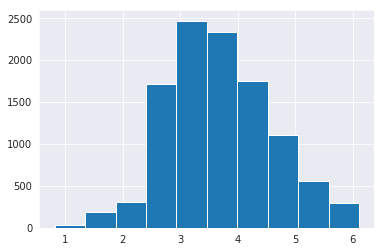

In [24]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.list_price.quantile(q=q)))

df.list_price.hist()

In [25]:
df = df[df.list_price <= 6]
train, test = train_test_split(df)

#Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     439.7
Date:                Mon, 01 Jul 2019   Prob (F-statistic):               0.00
Time:                        18:41:25   Log-Likelihood:                -4842.9
No. Observations:                8027   AIC:                             9800.
Df Residuals:                    7970   BIC:                         1.020e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            3.4317      0.014    247.983      0.000       3.405       3.459
piece_count                                          0.6832      0.010     66.960      0.000       0.663       0.703
num_reviews                                          0.0231      0.008      2.782      0.005       0.007       0.039
play_star_rating                                     0.0919      0.006     15.393      0.000       0.080       0.104
val_star_rating                                     -0.1445      0.006    -24.219      0.000      -0.156      -0.133
ages_10_21                                           0.6971      0.040     17.616      0.000       0.620       0.775
ages_12_16                                          -0.2407      0.080     -3.015      0.003      -0.397      -0.084
ages_14plus                                          0.0511      0.050      1.018      0.309      -0.047       0.150
ages_2_5                                             0.4854      0.022     22.067      0.000       0.442       0.529
ages_4plus                                          -1.4457      0.125    -11.575      0.000      -1.690      -1.201
ages_5_12                                           -0.7316      0.032    -22.716      0.000      -0.795      -0.668
ages_6plus                                          -0.9699      0.069    -14.062      0.000      -1.105      -0.835
ages_6_12                                           -0.2140      0.019    -11.222      0.000      -0.251      -0.177
ages_7_12                                            0.0582      0.024      2.441      0.015       0.011       0.105
ages_7_14                                           -0.0231      0.020     -1.133      0.257      -0.063       0.017
ages_8plus                                           0.5767      0.053     10.786      0.000       0.472       0.681
ages_8_12                                            0.1781      0.031      5.793      0.000       0.118       0.238
ages_8_14                                            0.2287      0.020     11.434      0.000       0.190       0.268
ages_9plus                                           0.2953      0.118      2.497      0.013       0.063       0.527
ages_9_12                                            0.2734      0.077      3.533      0.000       0.122       0.425
theme_name_BOOST                                     0.9137      0.122      7.490      0.000       0.675       1.153
theme_name_Blues_Helicopter_Pursuit                  0.7108      0.121      5.885      0.000       0.474       0.948
theme_name_Carnotaurus_Gyrosphere_Escape             1.0695      0.121      8.850      0.000       0.833       1.306
theme_name_City                          

In [ ]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

## Summary

Well done! As you can see, regression can be a challenging task that requires you to make decisions along the way, try alternative approaches and make ongoing refinements. These choices depend on the context and specific use cases. 